### Equivalent of Figure 1 but for the 80km model lid

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from CASutils import averaging_utils as avg
from CASutils import qbo_utils as qbo
from CASutils import plotposition_utils as plotpos
from CASutils import readdata_utils as read
from CASutils import colorbar_utils as cbars

import sys

In [2]:
plotpath="/project/cas/islas/python_plots/CAM7_vertres_paper/FIGURES/"

### Read in the monthly composites

In [3]:
basepath="/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/QBOcomposites/monthly/"
dz800_comp = xr.open_dataset(basepath+'dz800_composite_80km_50hpa.nc')
dz700_comp = xr.open_dataset(basepath+'dz700_composite_80km_50hpa.nc')
dz600_comp = xr.open_dataset(basepath+'dz600_composite_80km_50hpa.nc')
dz500_comp = xr.open_dataset(basepath+'dz500_composite_80km_50hpa.nc')
era5_comp = xr.open_dataset(basepath+'ERA5_composite_50hpa.nc')

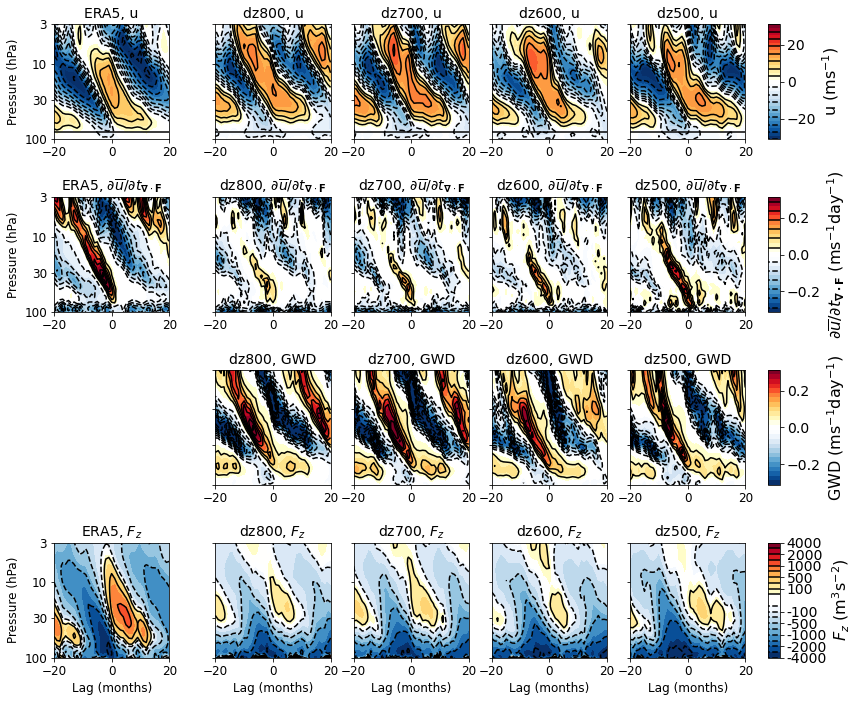

In [4]:
fig = plt.figure(figsize=(16,16))

ax = qbo.plotqbowinds(fig, era5_comp.uzm, era5_comp.time, era5_comp.plev,2,-30,30,'ERA5, u',0.03,0.13,0.7,0.8,plevvar='plev', contourlines=True, contourlinescale=2)
ax.plot([-20,20],[-np.log10(80),-np.log10(80)], color='black')

ax = qbo.plotqbowinds(fig, dz800_comp.uzm, dz800_comp.time, dz800_comp.ilev,2,-30,30,'dz800, u',0.17,0.27,0.7,0.8, ylabel=False, contourlines=True, contourlinescale=2)
ax.plot([-20,20],[-np.log10(80),-np.log10(80)], color='black')
ax = qbo.plotqbowinds(fig, dz700_comp.uzm, dz700_comp.time, dz700_comp.ilev,2,-30,30,'dz700, u',0.29,0.39,0.7,0.8,ylabel=False, contourlines=True, contourlinescale=2)
ax.plot([-20,20],[-np.log10(80),-np.log10(80)], color='black')
ax = qbo.plotqbowinds(fig, dz600_comp.uzm, dz600_comp.time, dz600_comp.ilev,2,-30,30,'dz600, u',0.41,0.51,0.7,0.8,ylabel=False, contourlines=True, contourlinescale=2)
ax.plot([-20,20],[-np.log10(80),-np.log10(80)], color='black')
ax = qbo.plotqbowinds(fig, dz500_comp.uzm, dz500_comp.time, dz500_comp.ilev,2,-30,30,'dz500, u',0.53,0.63,0.7,0.8,ylabel=False, contourlines=True, contourlinescale=2)
ax.plot([-20,20],[-np.log10(80),-np.log10(80)], color='black')

ax = cbars.plotcolorbar(fig, 2, -30, 30, 'u (ms$^{-1}$)',0.65,0.66,0.7,0.8,orient='vertical', contourlines=True, contourlinescale=2)


ciepfd = 0.025 ; cmaxepfd = 0.3
ax = qbo.plotqbowinds(fig, 86400.*era5_comp.utendepfd, era5_comp.time, era5_comp.plev, ciepfd, -1.*cmaxepfd, cmaxepfd, 
                      r'ERA5, $\partial\overline{u}/\partial t_{\mathbf{\nabla}\cdot\mathbf{F}}$',0.03,0.13,0.55,0.65,plevvar='plev', contourlines=True, contourlinescale=2)

ax = qbo.plotqbowinds(fig, 86400.*dz800_comp.utendepfd, dz800_comp.time, dz800_comp.ilev,ciepfd,-1*cmaxepfd,cmaxepfd,
                      r'dz800, $\partial\overline{u}/\partial t_{\mathbf{\nabla}\cdot\mathbf{F}}$',0.17,0.27,0.55,0.65, ylabel=False, contourlines=True, contourlinescale=2)
ax = qbo.plotqbowinds(fig, 86400.*dz700_comp.utendepfd, dz700_comp.time, dz700_comp.ilev,ciepfd,-1*cmaxepfd,cmaxepfd,
                      r'dz700, $\partial\overline{u}/\partial t_{\mathbf{\nabla}\cdot\mathbf{F}}$',0.29,0.39,0.55,0.65,ylabel=False, contourlines=True, contourlinescale=2)
ax = qbo.plotqbowinds(fig, 86400.*dz600_comp.utendepfd, dz600_comp.time, dz600_comp.ilev,ciepfd,-1*cmaxepfd,cmaxepfd,
                      r'dz600, $\partial\overline{u}/\partial t_{\mathbf{\nabla}\cdot\mathbf{F}}$',0.41,0.51,0.55,0.65,ylabel=False, contourlines=True, contourlinescale=2)
ax = qbo.plotqbowinds(fig, 86400.*dz500_comp.utendepfd, dz500_comp.time, dz500_comp.ilev,ciepfd,-1*cmaxepfd,cmaxepfd,
                      r'dz500, $\partial\overline{u}/\partial t_{\mathbf{\nabla}\cdot\mathbf{F}}$',0.53,0.63,0.55,0.65,ylabel=False, contourlines=True, contourlinescale=2)

ax = cbars.plotcolorbar(fig, ciepfd, -1.*cmaxepfd, cmaxepfd, r'$\partial \overline{u}/\partial t_{\mathbf{\nabla\cdot\mathbf{F}}}$ (ms$^{-1}$day$^{-1}$)',0.65,0.66,0.55,0.65,orient='vertical',
                       contourlines=True, contourlinescale=2)



ax = qbo.plotqbowinds(fig, 86400.*(dz800_comp.BUTGWSPEC + dz800_comp.UTGWSPEC + dz800_comp.UTGWORO),
                      dz800_comp.time, dz800_comp.ilev,ciepfd,-1.*cmaxepfd, cmaxepfd,'dz800, GWD',0.17,0.27,0.4,0.5,ylabel=False,
                     contourlines=True, contourlinescale=2)
ax = qbo.plotqbowinds(fig, 86400.*(dz700_comp.BUTGWSPEC + dz700_comp.UTGWSPEC + dz700_comp.UTGWORO), 
                      dz700_comp.time, dz700_comp.ilev,ciepfd,-1*cmaxepfd,cmaxepfd,
                      'dz700, GWD',0.29,0.39,0.4,0.5,ylabel=False,
                     contourlines=True, contourlinescale=2)
ax = qbo.plotqbowinds(fig, 86400.*(dz600_comp.BUTGWSPEC + dz600_comp.UTGWSPEC + dz600_comp.UTGWORO), 
                      dz600_comp.time, dz600_comp.ilev,ciepfd,-1*cmaxepfd,cmaxepfd,
                      'dz600, GWD',0.41,0.51,0.4,0.5,ylabel=False,
                     contourlines=True, contourlinescale=2)
ax = qbo.plotqbowinds(fig, 86400.*(dz500_comp.BUTGWSPEC + dz500_comp.UTGWSPEC + dz500_comp.UTGWORO),
                      dz500_comp.time, dz500_comp.ilev,ciepfd,-1*cmaxepfd,cmaxepfd,
                      'dz500, GWD',0.53,0.63,0.4,0.5,ylabel=False,
                     contourlines=True, contourlinescale=2)

ax = cbars.plotcolorbar(fig, ciepfd, -1.*cmaxepfd, cmaxepfd, 'GWD (ms$^{-1}$day$^{-1}$)',0.65,0.66,0.4,0.5,orient='vertical')


clevs=[-4000,-3000,-2000,-1500,-1000,-750,-500,-250,-100,-50,0,
       50,100,250,500,750,1000,1500,2000,3000,4000]
levhilight=-750
hilightcolor='magenta'

ax = qbo.plotqbowinds(fig, era5_comp.epfz, era5_comp.time, era5_comp.plev, 0.1, -1., 1., 
                      'ERA5, $F_{z}$',0.03,0.13,0.25,0.35,plevvar='plev', speclevs=clevs, contourlines=True, contourlinescale=2,
                     xlabel='Lag (months)')    
ax = qbo.plotqbowinds(fig, dz800_comp.epfz, dz800_comp.time, dz800_comp.ilev,0.1,-1.,1.,
                      'dz800, $F_{z}$',0.17,0.27,0.25,0.35, ylabel=False, speclevs=clevs, contourlines=True, contourlinescale=2,
                     xlabel='Lag (months)')
ax = qbo.plotqbowinds(fig, dz700_comp.epfz, dz700_comp.time, dz700_comp.ilev,0.1,-1.,1.,
                      'dz700, $F_{z}$',0.29,0.39,0.25,0.35,ylabel=False, speclevs=clevs, contourlines=True, contourlinescale=2,
                     xlabel='Lag (months)')
ax = qbo.plotqbowinds(fig, dz600_comp.epfz, dz600_comp.time, dz600_comp.ilev,0.1,-1.,1.,
                      'dz600, $F_{z}$',0.41,0.51,0.25,0.35,ylabel=False, speclevs=clevs, contourlines=True, contourlinescale=2,
                     xlabel='Lag (months)')
ax = qbo.plotqbowinds(fig, dz500_comp.epfz, dz500_comp.time, dz500_comp.ilev,0.1,-1.,1.,
                      'dz500, $F_{z}$',0.53,0.63,0.25,0.35,ylabel=False, speclevs=clevs, contourlines=True, contourlinescale=2,
                     xlabel='Lag (months)')

ax = cbars.plotcolorbar_sayc(fig, clevs, '$F_{z}$ (m$^{3}$s$^{-2}$)',0.65,0.66,0.25,0.35,orient='vertical', contourlines=True,
                            ticks=[-4000,-2000,-1000,-500,-100,100,500,1000,2000,4000])

fig.savefig(plotpath+'fig12.pdf', bbox_inches='tight', facecolor='white')